# Time Series Data

In [69]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import random

#  Objectives

- Understand the use case for time series data
- Manipulate datetime objects
- Understand different resampling techniques
- Implement different visualization techniques for time series data

# What Are Time Series Data?

> We can say data is a **time series** when the temporal information is a key focus of the data.

Data in a time series can stem from historical data or data that is dependent on past values.

## Some Examples

- Stock prices
- Atmospheric changes over the course of decades
- Audio samples
- Heart rate data

## Uses for Time Series

- Understand some underlying process
- Forecasting (what we'll mostly focus on)
- Imputation (filling missing "past" data)
- Anomaly detection

## Example Data

This data comes from [Google Trends](https://trends.google.com). Try entering a search term! The little question-mark icon on the new page explains how to interpret the numbers.

In [70]:
# Define a function that will help us load and
# clean up a dataset.

def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['counts']
    df['counts'] = df['counts'].str.replace('<1', '0').astype(int)
    return df

In [71]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})
df.head()

,counts
2004-01,17
2004-02,5
2004-03,11
2004-04,10
2004-05,8


Now we can do this with multiple time series data!

In [72]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'coronavirus', 'country_code': 'us'},
    {'trend_name': 'trump', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},
    {'trend_name': 'avengers', 'country_code': 'us'}
]

In [73]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [74]:
temp = list(zip(trends, trend_dfs))
random.shuffle(temp)
res1, res2 = zip(*temp)
trends, trend_dfs = list(res1), list(res2)

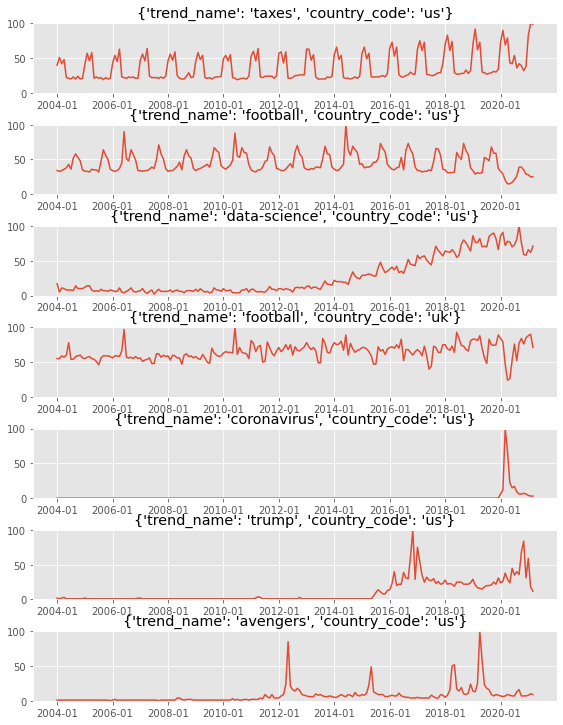

In [75]:
# Let's see if we can guess which is which just by looking
# at their graphs.

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    ax.set_title(str(trends[i]))
    ax.plot(np.array(trend_df.index), trend_df['counts'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

# Datetime Objects

Datetime objects make our time series modeling lives easier.  They will allow us to perform essential data prep tasks with a few lines of code.  

We need our time series **index** to be datetime objects, since our models will rely on being able to identify the previous chronological value.

There is a `datetime` [library](https://docs.python.org/2/library/datetime.html), and inside `pandas` there is a datetime module as well as a to_datetime() function.

For time series modeling, the first step often is to make sure that the index is a datetime object.

## Setting Datetime Objects as the Index

There are a few ways to **reindex** our series to datetime. 

We can use `pandas.to_datetime()` method:

Our data for this lesson comes from the a dataset you can find on Kaggle [here](https://www.kaggle.com/datasets/jyotiprasadpal/historical-sales-data-on-daily-basis-of-a-company). It lists sales data for a European company.

In [76]:
ts_no_datetime = pd.read_csv('data/Historical_Data.csv')

In [77]:
ts_no_datetime.head()

,Date,Article_ID,Country_Code,Sold_Units
0,20170817,1132,AT,1
1,20170818,1132,AT,1
2,20170821,1132,AT,1
3,20170822,1132,AT,1
4,20170906,1132,AT,1


In [78]:
ts_no_datetime['Country_Code'].unique()

array(['AT', 'FI', 'FR', 'SE'], dtype=object)

These countries are Austria, Finland, France, and Sweden.

In [79]:
ts_no_datetime.index

RangeIndex(start=0, stop=4849, step=1)

In [80]:
ts_no_datetime.dtypes

Date             int64
Article_ID       int64
Country_Code    object
Sold_Units       int64
dtype: object

In [81]:
ts = ts_no_datetime.set_index(pd.to_datetime(ts_no_datetime['Date']), drop=True)

In [82]:
ts.head()

,Date,Article_ID,Country_Code,Sold_Units
Date,,,,
1970-01-01 00:00:00.020170817,20170817,1132,AT,1
1970-01-01 00:00:00.020170818,20170818,1132,AT,1
1970-01-01 00:00:00.020170821,20170821,1132,AT,1
1970-01-01 00:00:00.020170822,20170822,1132,AT,1
1970-01-01 00:00:00.020170906,20170906,1132,AT,1


> Alternatively, we can parse the dates directly on import

In [83]:
ts = pd.read_csv('data/Historical_Data.csv', index_col='Date', parse_dates=True)

In [84]:
print(f"Now our index is a {type(ts.index)}")

Now our index is a <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [85]:
ts.head()

,Article_ID,Country_Code,Sold_Units
Date,,,
2017-08-17,1132,AT,1
2017-08-18,1132,AT,1
2017-08-21,1132,AT,1
2017-08-22,1132,AT,1
2017-09-06,1132,AT,1


## Investigating Time Series with Datetime Objects

Datetime objects include aspects of the date as attributes, like month and year:

In [86]:
ts.index[0]

Timestamp('2017-08-17 00:00:00')

In [87]:
ts.index[0].month

8

In [88]:
ts.index[0].year

2017

In [89]:
ts = ts.sort_index()

We can also use the date to directly slice the DataFrame

In [90]:
# Only data 2019 and after
ts['2019':]

,Article_ID,Country_Code,Sold_Units
Date,,,
2019-01-01,332,FI,1
2019-01-01,3448,SE,2
2019-01-01,5984,FI,2
2019-01-01,332,SE,3
2019-01-01,5972,SE,3
2019-01-01,1132,FR,1
2019-01-01,1516,FR,3
2019-01-02,1516,FR,6
2019-01-02,362,FR,1


In [91]:
# Only data from this time period
ts['2018-02-01':'2018-02-08']

,Article_ID,Country_Code,Sold_Units
Date,,,
2018-02-01,3576,AT,2
2018-02-01,3448,SE,1
2018-02-01,1516,FR,1
2018-02-01,332,SE,1
2018-02-01,1132,FR,1
2018-02-02,1516,FR,1
2018-02-02,2902,SE,3
2018-02-03,1516,FR,2
2018-02-03,3448,SE,1


We can easily see now whether more products are sold, for example, during winter months. For simplicity we'll say that winter comprises the months of January, February, and March.

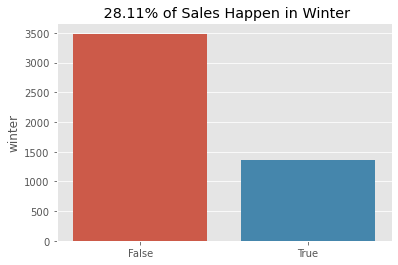

In [92]:
fig, ax = plt.subplots()

ts['month'] = ts.index
ts['month'] = ts['month'].apply(lambda x: x.month)
ts['winter'] = ts['month'].apply(lambda x: 1 <= x <= 3)

sum_ratio = ts['winter'].value_counts()[1]/len(ts)

x = ts['winter'].value_counts().index
y = ts['winter'].value_counts()
sns.barplot(x=x, y=y)

ax.set_title(f'{sum_ratio: 0.2%} of Sales Happen in Winter');

# Resampling Techniques

> **Resampling** allows us to convert the time series into a particular frequency

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

With a Datetime index, we also have new abilities, such as **resampling**.

To create our timeseries, we will count the number of sales reported per week.

In [93]:
#Resample to weekly
ts.resample('W')

There are many possible units for resampling, each with its own alias:

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

When resampling, we have to provide a rule to resample by, and an **aggregate function**.

**To upsample** is to increase the frequency of the data of interest.  
**To downsample** is to decrease the frequency of the data of interest.

For our purposes, we will downsample, and  count the number of occurences per week.

In [94]:
#Resample to weekly counts
ts.resample('W').count()

,Article_ID,Country_Code,Sold_Units,month,winter
Date,,,,,
2017-01-01,1,1,1,1,1
2017-01-08,19,19,19,19,19
2017-01-15,23,23,23,23,23
2017-01-22,24,24,24,24,24
2017-01-29,19,19,19,19,19
2017-02-05,20,20,20,20,20
2017-02-12,19,19,19,19,19
2017-02-19,23,23,23,23,23
2017-02-26,29,29,29,29,29


Our time series will consist of a series of counts of sales per week.

In [95]:
# Choosing Article_ID is unimportant.
# We could choose any column, as long as
# there are no nulls!
ts_resampled = ts.resample('W').count()['Article_ID']

In [96]:
type(ts_resampled)

pandas.core.series.Series

In [97]:
ts_resampled

Date
2017-01-01     1
2017-01-08    19
2017-01-15    23
2017-01-22    24
2017-01-29    19
2017-02-05    20
2017-02-12    19
2017-02-19    23
2017-02-26    29
2017-03-05    34
2017-03-12    29
2017-03-19    30
2017-03-26    32
2017-04-02    40
2017-04-09    20
2017-04-16    23
2017-04-23    34
2017-04-30    25
2017-05-07    34
2017-05-14    32
2017-05-21    37
2017-05-28    41
2017-06-04    36
2017-06-11    31
2017-06-18    30
2017-06-25    35
2017-07-02    22
2017-07-09    32
2017-07-16    38
2017-07-23    37
2017-07-30    36
2017-08-06    28
2017-08-13    42
2017-08-20    39
2017-08-27    38
2017-09-03    40
2017-09-10    43
2017-09-17    35
2017-09-24    42
2017-10-01    37
2017-10-08    33
2017-10-15    40
2017-10-22    45
2017-10-29    38
2017-11-05    34
2017-11-12    36
2017-11-19    38
2017-11-26    55
2017-12-03    37
2017-12-10    42
2017-12-17    42
2017-12-24    23
2017-12-31    39
2018-01-07    46
2018-01-14    43
2018-01-21    54
2018-01-28    48
2018-02-04    42
2018-02-1

Let's visualize our timeseries with a plot.

In [98]:
ts_resampled.tail(8)

Date
2018-12-30    52
2019-01-06    52
2019-01-13    60
2019-01-20    65
2019-01-27    80
2019-02-03    73
2019-02-10    68
2019-02-17    26
Freq: W-SUN, Name: Article_ID, dtype: int64

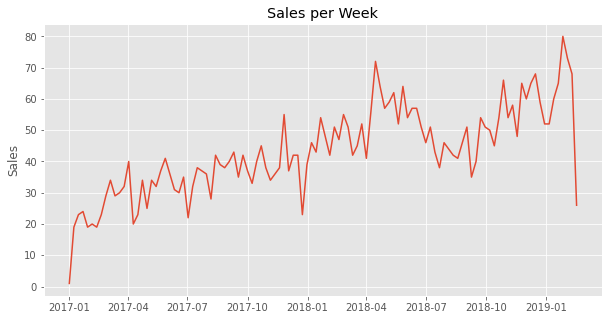

In [99]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts_resampled.index, ts_resampled.values)
ax.set_title('Sales per Week')
ax.set_ylabel('Sales');

## Aside: Deeper Exploration

In [100]:
print(ts_resampled.head(2), ts_resampled.tail(2))

Date
2017-01-01     1
2017-01-08    19
Freq: W-SUN, Name: Article_ID, dtype: int64 Date
2019-02-10    68
2019-02-17    26
Freq: W-SUN, Name: Article_ID, dtype: int64


There are very large jumps in values at the beginning and at the end of our time series. In fact, we may suspect that the sales figures are incomplete.

Let's suppose that we want to amend the sales numbers at the two ends of our time series. 

There are several ways to do this. One way is to remove the outliers and populate an empty array with the original date range. That will introduce us to the `pandas.date_range()` method.

Let's try this at the beginning of our series.

In [101]:
ts_resampled.index[0]

Timestamp('2017-01-01 00:00:00', freq='W-SUN')

In [102]:
ts_resampled.index[-1]

Timestamp('2019-02-17 00:00:00', freq='W-SUN')

In [103]:
ts_wr

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05',
               ...
               '2018-12-16', '2018-12-23', '2018-12-30', '2019-01-06',
               '2019-01-13', '2019-01-20', '2019-01-27', '2019-02-03',
               '2019-02-10', '2019-02-17'],
              dtype='datetime64[ns]', length=112, freq='W-SUN')

In [104]:
ts_weekly

0      1.633969e-209
1      1.797363e-209
2      1.960756e-209
3      2.124150e-209
4      2.287543e-209
5      2.468477e-209
6      2.795264e-209
7      3.122051e-209
8      3.448838e-209
9      3.775625e-209
10     4.102412e-209
11     4.429200e-209
12     4.755987e-209
13     5.298754e-209
14     5.952328e-209
15     6.605902e-209
16     7.259477e-209
17     7.913051e-209
18     8.566625e-209
19     9.220200e-209
20     1.001396e-208
21     1.132111e-208
22     1.262826e-208
23     1.393541e-208
24     1.524255e-208
25     1.654970e-208
26     1.785685e-208
27     1.916400e-208
28     2.147512e-208
29     2.408942e-208
30     2.670372e-208
31     2.931801e-208
32     3.193231e-208
33     3.454661e-208
34     3.716091e-208
35     4.061605e-208
36     4.584465e-208
37     5.107324e-208
38     5.630184e-208
39     6.153043e-208
40     6.675903e-208
41     7.198762e-208
42     7.721622e-208
43     8.702091e-208
44     9.747810e-208
45     1.079353e-207
46     1.183925e-207
47     1.2884

In [105]:
weekly_count = ts_resampled[ts_resampled > 1]
ts_wr = pd.date_range(ts_resampled.index[0], ts_resampled.index[-1], freq='W')
ts_weekly = np.empty(shape=len(ts_wr))
ts_weekly = pd.Series(ts_weekly)
ts_weekly = ts_weekly.reindex(ts_wr)
ts_new = ts_weekly.fillna(weekly_count)

In [106]:
ts_new.head()

2017-01-01     NaN
2017-01-08    19.0
2017-01-15    23.0
2017-01-22    24.0
2017-01-29    19.0
Freq: W-SUN, dtype: float64

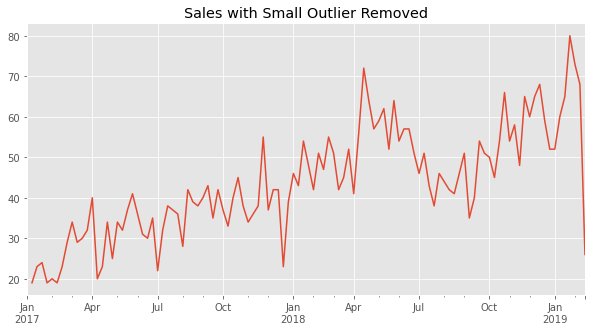

In [107]:
fig, ax = plt.subplots(figsize=(10, 5))
ts_new.plot(ax=ax)
ax.set_title('Sales with Small Outlier Removed');

Let's zoom in on the first month:

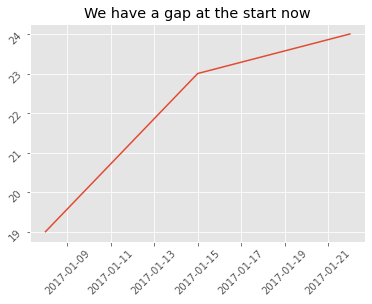

In [108]:
fig, ax = plt.subplots()
ax.plot(ts_new[ts_new.index < '2017-01-24'])
ax.tick_params(rotation=45)
ax.set_title('We have a gap at the start now');

In general, the datetime object allows us several options of how to fill those gaps:

### `.bfill()`, `.ffill()`, and `.interpolate()`

The `.bfill()` time-series method will take known values and project them *backward* to fill gaps. Let's try that here:

In [109]:
print(ts_new.head(), '\n', '*'*30, '\n', ts_new.bfill().head())

2017-01-01     NaN
2017-01-08    19.0
2017-01-15    23.0
2017-01-22    24.0
2017-01-29    19.0
Freq: W-SUN, dtype: float64 
 ****************************** 
 2017-01-01    19.0
2017-01-08    19.0
2017-01-15    23.0
2017-01-22    24.0
2017-01-29    19.0
Freq: W-SUN, dtype: float64


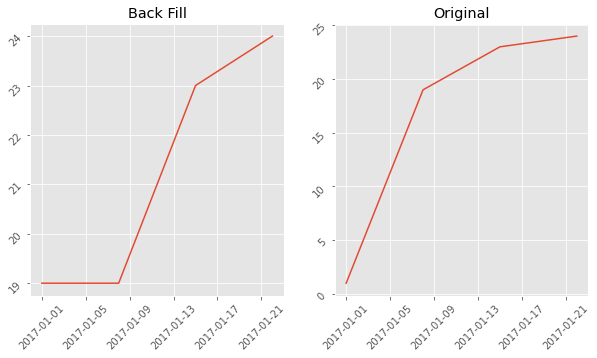

In [110]:
# .bfill()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts_new.bfill()[ts_new.index < '2017-01-24'])

ax1.tick_params(rotation=45)
ax1.set_title('Back Fill')

ax2.plot(ts_resampled[ts_resampled.index < '2017-01-24'])
ax2.tick_params(rotation=45)
ax2.set_title('Original');

In [111]:
ts_new = ts_new.bfill()

What about the end of our series? The value of 26 at the end is unusually low.

In [112]:
ts_new[(ts_new < 30) & (ts_new.index > '2018-01-01')]

2019-02-17    26.0
Freq: W-SUN, dtype: float64

The `.ffill()` time-series method will take known values and project them *forward* to fill gaps. Let's try that here. First we need to create the gap.

In [113]:
weekly_count = ts_new[~(ts_new < 30) | ~(ts_new.index > '2018-01-01')]
ts_wr = pd.date_range(ts_new.index[0], ts_new.index[-1], freq='W')
ts_weekly = np.empty(shape=len(ts_wr))
ts_weekly = pd.Series(ts_weekly)
ts_weekly = ts_weekly.reindex(ts_wr)
ts_new = ts_weekly.fillna(weekly_count)

In [114]:
print(ts_new.tail(), '\n', '*'*30, '\n', ts_new.ffill().tail())

2019-01-20    65.0
2019-01-27    80.0
2019-02-03    73.0
2019-02-10    68.0
2019-02-17     NaN
Freq: W-SUN, dtype: float64 
 ****************************** 
 2019-01-20    65.0
2019-01-27    80.0
2019-02-03    73.0
2019-02-10    68.0
2019-02-17    68.0
Freq: W-SUN, dtype: float64


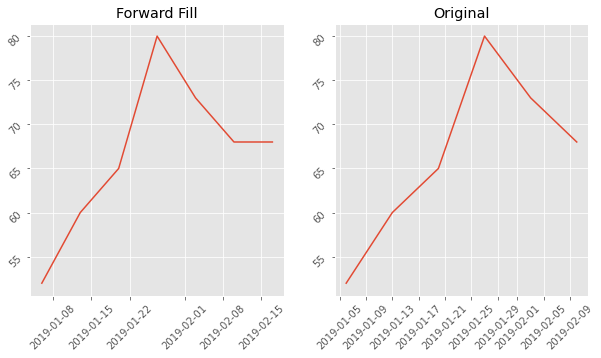

In [115]:
# .ffill()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts_new.ffill()[ts_new.index > '2019-01-01'])
ax1.tick_params(rotation=45)
ax1.set_title('Forward Fill')

ax2.plot(ts_new[ts_new.index > '2019-01-01'])
ax2.tick_params(rotation=45)
ax2.set_title('Original');

In [116]:
ts_new = ts_new.ffill()

The `.interpolate()` time-series method will simply connect the endpoints that define a gap with a straight line.

Suppose we wanted to smooth over the fluctuations in late 2017, which look like this:

In [117]:
ts_new[(ts_new.index > '2017-11-13') & (ts_new.index < '2018-01-02')]

2017-11-19    38.0
2017-11-26    55.0
2017-12-03    37.0
2017-12-10    42.0
2017-12-17    42.0
2017-12-24    23.0
2017-12-31    39.0
Freq: W-SUN, dtype: float64

We could treat the values for 11-26 through 12-24 as outliers and then fill in the gaps with the `.interpolate()` method. Let's try it!

### Exercise

Create a gap for the values between the dates **11-26-2017** and **12-24-2017** and then use the `.interpolate()` method to fill it in. Make a plot like the ones above to show the results of your work. The first couple lines are filled in for you.

In [118]:
weekly_count

2017-01-01    19.0
2017-01-08    19.0
2017-01-15    23.0
2017-01-22    24.0
2017-01-29    19.0
2017-02-05    20.0
2017-02-12    19.0
2017-02-19    23.0
2017-02-26    29.0
2017-03-05    34.0
2017-03-12    29.0
2017-03-19    30.0
2017-03-26    32.0
2017-04-02    40.0
2017-04-09    20.0
2017-04-16    23.0
2017-04-23    34.0
2017-04-30    25.0
2017-05-07    34.0
2017-05-14    32.0
2017-05-21    37.0
2017-05-28    41.0
2017-06-04    36.0
2017-06-11    31.0
2017-06-18    30.0
2017-06-25    35.0
2017-07-02    22.0
2017-07-09    32.0
2017-07-16    38.0
2017-07-23    37.0
2017-07-30    36.0
2017-08-06    28.0
2017-08-13    42.0
2017-08-20    39.0
2017-08-27    38.0
2017-09-03    40.0
2017-09-10    43.0
2017-09-17    35.0
2017-09-24    42.0
2017-10-01    37.0
2017-10-08    33.0
2017-10-15    40.0
2017-10-22    45.0
2017-10-29    38.0
2017-11-05    34.0
2017-11-12    36.0
2017-11-19    38.0
2017-11-26    55.0
2017-12-03    37.0
2017-12-10    42.0
2017-12-17    42.0
2017-12-24    23.0
2017-12-31  

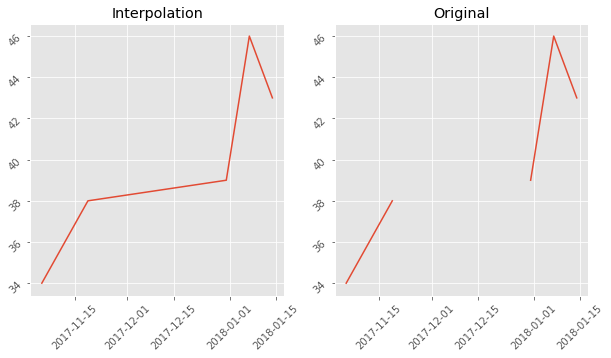

In [122]:
# Your code here
weekly_count = ts_new[(ts_new.index < '11-26-2017') | (ts_new.index > '12-24-2017')] #I want the values before November 26, 2017, and the values after December 24, 2017
#I want to get my date range
ts_wr = pd.date_range(weekly_count.index[0], weekly_count.index[-1], freq='W')
#Make an empty array of length ts_wr
ts_weekly = np.empty(shape=len(ts_wr))
ts_weekly = pd.Series(ts_weekly)
ts_weekly = ts_weekly.reindex(ts_wr)

#fill in our original values
ts_new = ts_weekly.fillna(weekly_count)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts_new.interpolate()[(ts_new.index > '2017-11-01') & (ts_new.index < '2018-01-15')])
ax1.tick_params(rotation=45)
ax1.set_title('Interpolation')
ax2.plot(ts_new[(ts_new.index > '2017-11-01') & (ts_new.index < '2018-01-15')])
ax2.tick_params(rotation=45)
ax2.set_title('Original');

In [120]:
ts_new

2017-01-01    19.0
2017-01-08    19.0
2017-01-15    23.0
2017-01-22    24.0
2017-01-29    19.0
2017-02-05    20.0
2017-02-12    19.0
2017-02-19    23.0
2017-02-26    29.0
2017-03-05    34.0
2017-03-12    29.0
2017-03-19    30.0
2017-03-26    32.0
2017-04-02    40.0
2017-04-09    20.0
2017-04-16    23.0
2017-04-23    34.0
2017-04-30    25.0
2017-05-07    34.0
2017-05-14    32.0
2017-05-21    37.0
2017-05-28    41.0
2017-06-04    36.0
2017-06-11    31.0
2017-06-18    30.0
2017-06-25    35.0
2017-07-02    22.0
2017-07-09    32.0
2017-07-16    38.0
2017-07-23    37.0
2017-07-30    36.0
2017-08-06    28.0
2017-08-13    42.0
2017-08-20    39.0
2017-08-27    38.0
2017-09-03    40.0
2017-09-10    43.0
2017-09-17    35.0
2017-09-24    42.0
2017-10-01    37.0
2017-10-08    33.0
2017-10-15    40.0
2017-10-22    45.0
2017-10-29    38.0
2017-11-05    34.0
2017-11-12    36.0
2017-11-19    38.0
2017-11-26     NaN
2017-12-03     NaN
2017-12-10     NaN
2017-12-17     NaN
2017-12-24     NaN
2017-12-31  

<details>
    <summary>Answer</summary>
<code>weekly_count = ts_new[(ts_new.index < '11-26-2017') | (ts_new.index > '12-24-2017')]
ts_wr = pd.date_range(weekly_count.index[0], weekly_count.index[-1], freq='W')
ts_weekly = np.empty(shape=len(ts_wr))
ts_weekly = pd.Series(ts_weekly)
ts_weekly = ts_weekly.reindex(ts_wr)
ts_new = ts_weekly.fillna(weekly_count)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(ts_new.interpolate()[(ts_new.index > '2017-11-01') & (ts_new.index < '2018-01-15')])
ax1.tick_params(rotation=45)
ax1.set_title('Interpolation')
ax2.plot(ts_new[(ts_new.index > '2017-11-01') & (ts_new.index < '2018-01-15')])
ax2.tick_params(rotation=45)
ax2.set_title('Original');</code>
    </details>

Let's proceed with the data that has all of these filled-in values.

In [123]:
ts = ts_new.interpolate()
ts.isna().sum()

0

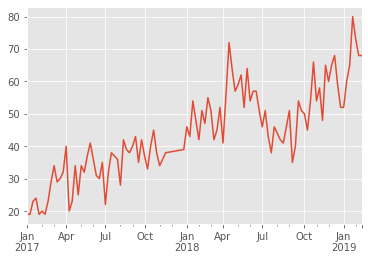

In [124]:
ts.plot();

# Visualizing Time Series

There can be a lot information to be found in time series! Visualizations can help us tease out this information to something we can more easily observe.

## Showing Changes Over Time

Can identify patterns and trends with visualizations

In [125]:
# New York Stock Exchange average monthly returns [1961-1966] from curriculum
nyse = pd.read_csv("data/NYSE_monthly.csv")
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

In [126]:
display(nyse.head(10))
display(nyse.info())

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
1961-06-01,-0.042
1961-07-01,0.011
1961-08-01,0.021
1961-09-01,-0.030


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   monthly_return  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


None

### Line Plot

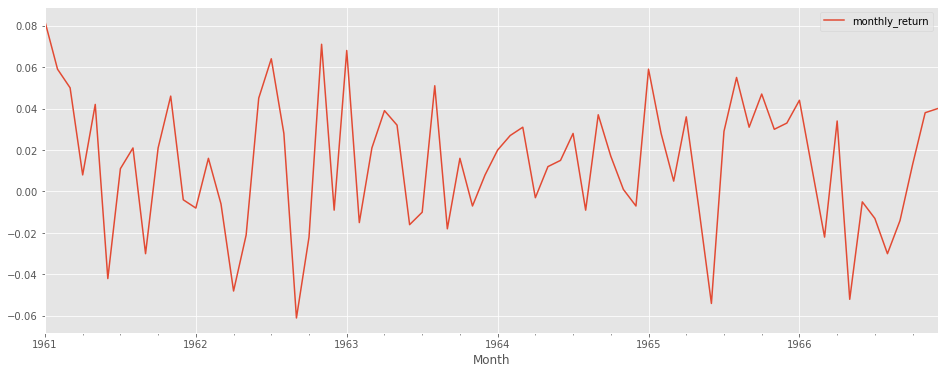

In [127]:
nyse.plot(figsize=(16, 6))
plt.show()

### Dot Plot

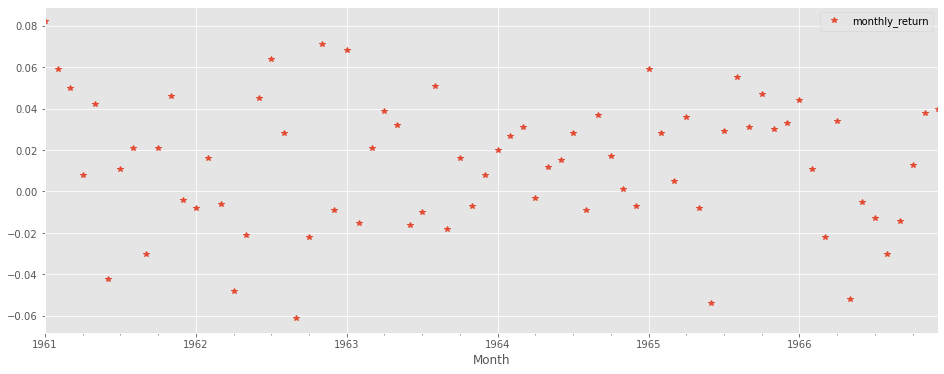

In [128]:
nyse.plot(figsize=(16, 6), style="*")
plt.show()

> Note the difference between this and the line plot.
>
> When might you want a dot vs a line plot?

### Grouping Plots

What if we wanted to look at year-to-year (e.g., temperature throughout many years)

There are a couple options to choose from.

#### All Annual Separated

In [130]:
year_groups

In [132]:
nyse

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
1961-06-01,-0.042
1961-07-01,0.011
1961-08-01,0.021
1961-09-01,-0.030


In [131]:
nyse_annual

,1961,1962,1963,1964,1965,1966
0,0.082,-0.008,0.068,0.020,0.059,0.044
1,0.059,0.016,-0.015,0.027,0.028,0.011
2,0.050,-0.006,0.021,0.031,0.005,-0.022
3,0.008,-0.048,0.039,-0.003,0.036,0.034
4,0.042,-0.021,0.032,0.012,-0.008,-0.052
5,-0.042,0.045,-0.016,0.015,-0.054,-0.005
6,0.011,0.064,-0.010,0.028,0.029,-0.013
7,0.021,0.028,0.051,-0.009,0.055,-0.030
8,-0.030,-0.061,-0.018,0.037,0.031,-0.014
9,0.021,-0.022,0.016,0.017,0.047,0.013


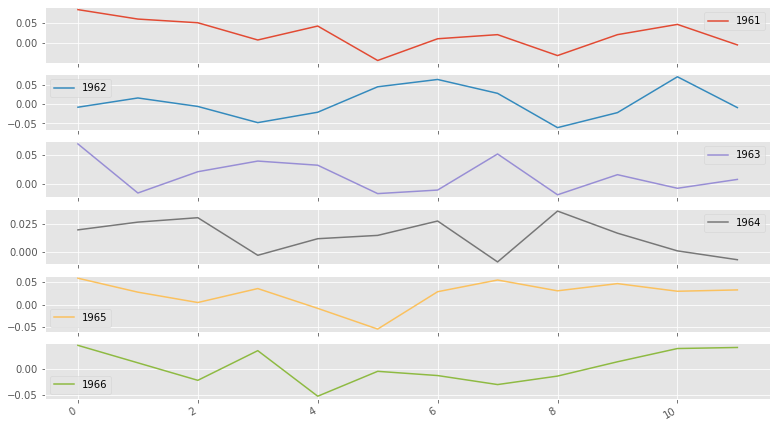

In [129]:
# Annual Frequency
year_groups = nyse.groupby(pd.Grouper(freq='A'))

#Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize=(13, 8), subplots=True, legend=True)
plt.show()

In [133]:
nyse_annual

,1961,1962,1963,1964,1965,1966
0,0.082,-0.008,0.068,0.020,0.059,0.044
1,0.059,0.016,-0.015,0.027,0.028,0.011
2,0.050,-0.006,0.021,0.031,0.005,-0.022
3,0.008,-0.048,0.039,-0.003,0.036,0.034
4,0.042,-0.021,0.032,0.012,-0.008,-0.052
5,-0.042,0.045,-0.016,0.015,-0.054,-0.005
6,0.011,0.064,-0.010,0.028,0.029,-0.013
7,0.021,0.028,0.051,-0.009,0.055,-0.030
8,-0.030,-0.061,-0.018,0.037,0.031,-0.014
9,0.021,-0.022,0.016,0.017,0.047,0.013


#### All Annual Together

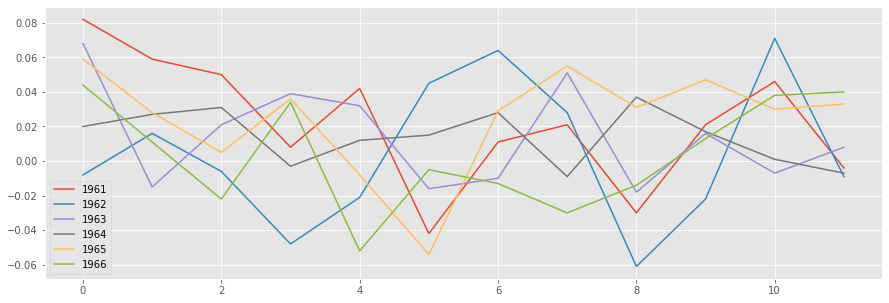

In [134]:
# Plot overlapping yearly groups 
nyse_annual.plot(figsize=(15, 5), subplots=False, legend=True)
plt.show()

## Showing Distributions

Sometimes the distribution of the values is important.

What are some reasons?

- Checking for normality (for stat testing)
- First check on raw & transformed data

### Histogram

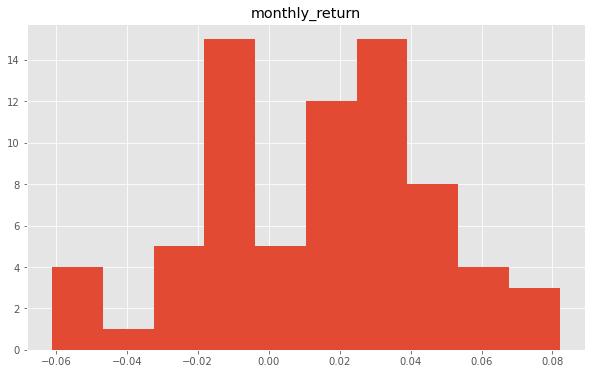

In [135]:
nyse.hist(figsize=(10, 6))
plt.show()

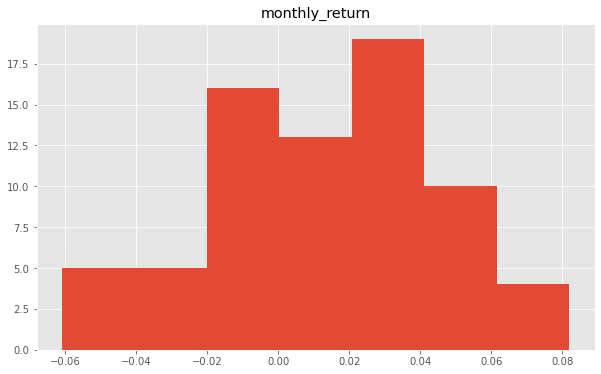

In [136]:
# Bin it to make it more obvious if normal
nyse.hist(figsize=(10, 6), bins=7)
plt.show()

### Density

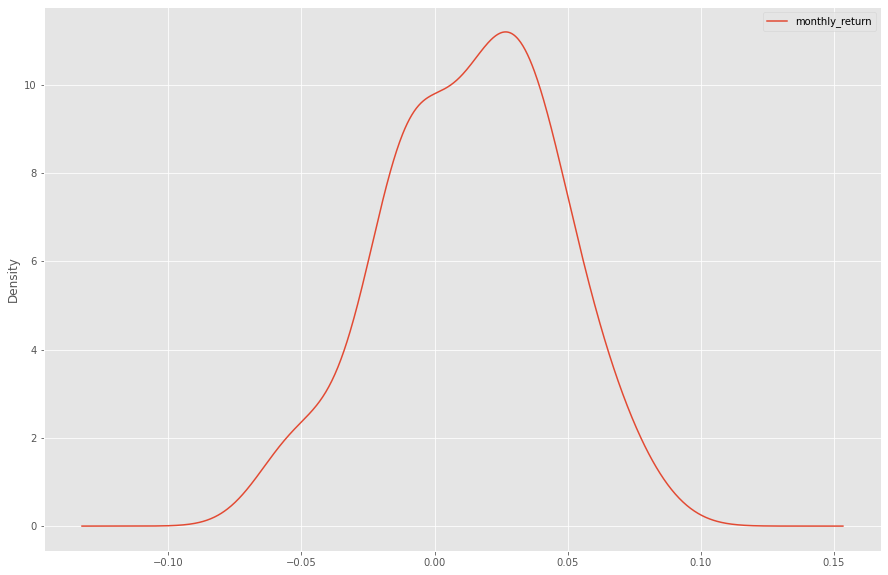

In [137]:
nyse.plot(kind='kde', figsize=(15, 10))
plt.show()

### Box Plot

- Shows distribution over time
- Can help show outliers
- Seasonal trends

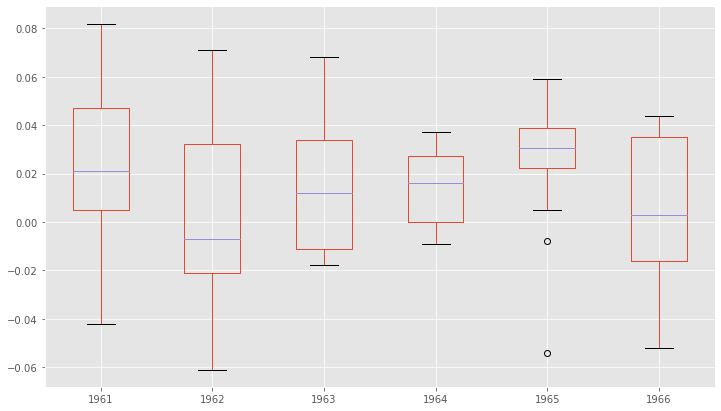

In [138]:
# Generate a box and whiskers plot for temp_annual dataframe
nyse_annual.boxplot(figsize=(12, 7))
plt.show()

### Heat Maps

Use color to show patterns throughout a time period for data

#### Example of how heat maps are useful

In [139]:
df_temp = pd.read_csv(
    'data/min_temp.csv',        # Data to read
    index_col=0,                # Use the first column as index ('Date')
    parse_dates=True,           # Have Pandas parse the dates
    infer_datetime_format=True, # Make Pandas try to parse dates automatically
    dayfirst=True               # Impoprtant to know format is DD/MM
)

In [140]:
display(df_temp.head())
display(df_temp.info())

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Daily_min  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


None

In [141]:
# Create a new DataFrame and store yearly values in columns for temperature
temp_annual = pd.DataFrame()

for yr, group in df_temp.groupby(pd.Grouper(freq='A')):
    temp_annual[yr.year] = group.values.ravel()

In [142]:
temp_annual

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
5,15.8,12.5,12.1,16.3,11.0,12.6,16.3,15.2,9.5,15.3
6,15.8,14.1,12.8,16.1,13.2,13.1,16.8,17.0,12.2,16.4
7,17.4,14.8,16.2,13.0,12.2,15.4,11.0,18.7,15.7,14.8
8,21.8,16.2,15.5,13.4,14.4,11.9,8.5,16.5,16.3,17.4
9,20.0,15.8,13.0,15.2,13.7,13.8,13.2,17.4,13.6,18.8


##### Plotting each line plot in a subplot

Let's use our strategy in plotting multiple line plots to see if we can see a pattern:

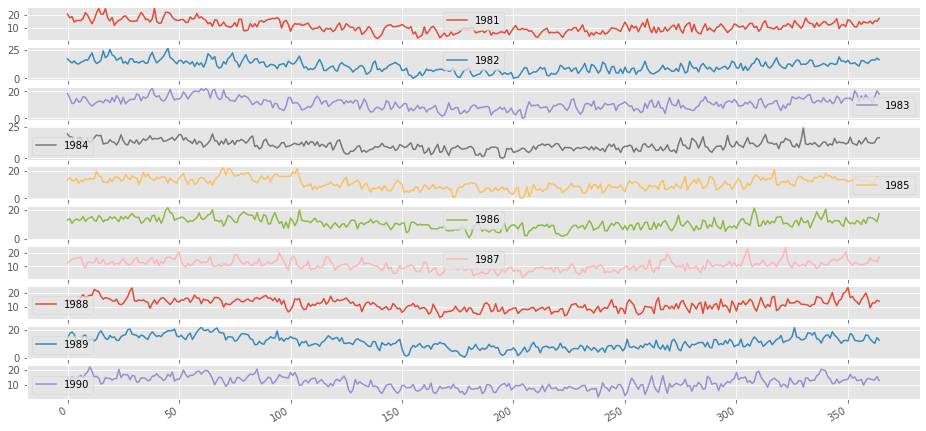

In [143]:
# Plot the yearly groups as subplots
temp_annual.plot(figsize=(16, 8), subplots=True, legend=True)
plt.show()

You likely will have a hard time seeing exactly what the temperature shift is throughout the year (if it even exists!)

We can try plotting all the lines together to see if a pattern is more obvious in our visual.

##### Plotting all line plots in one plot

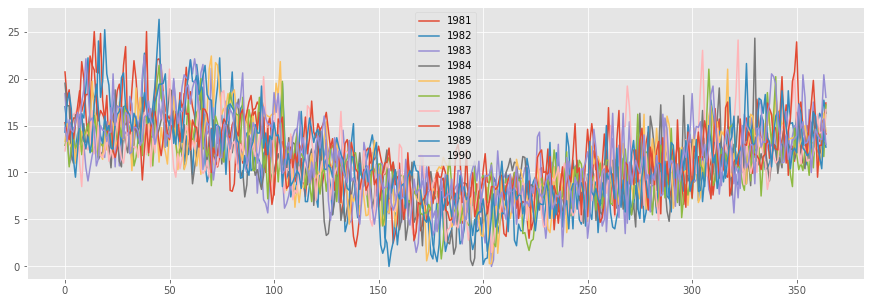

In [144]:
# Plot overlapping yearly groups 
temp_annual.plot(figsize=(15, 5), subplots=False, legend=True)
plt.show()

That's great we can see that the temperature decreases in the middle of the data! But now we sacrificed being able to observe any pattern for an individual year. 

This is where using a heat map can help visualize patterns throughout the year for temperature! And of course, the heat map can be used for more than just temperature related data.

##### And finally, using a heat map to visualize a pattern

In [146]:
year_matrix

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7
1990,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,15.7,13.0


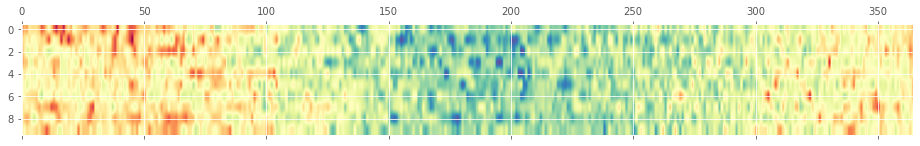

In [148]:
# Year and month 
year_matrix = temp_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

# Level Up: More EDA

In [ ]:
raw = pd.read_csv('data/Historical_Data.csv')

In [ ]:
raw.head()

Let's look at some summary stats:

In [ ]:
print(f"There are {raw.shape[0]} records in our timeseries")

In [ ]:
raw['Country_Code'].value_counts()

In [ ]:
fig, ax = plt.subplots()

ccc = raw['Country_Code'].value_counts()
ax.bar(x=ccc.index, height=ccc);

In [ ]:
raw['Article_ID'].value_counts()

In [ ]:
fig, ax = plt.subplots()

aic = raw['Article_ID'].value_counts()
ax.bar(x=aic.index.astype(str), height=aic)
ax.tick_params(rotation=45, axis='x');

In [ ]:
raw['Sold_Units'].value_counts()

In [ ]:
fig, ax = plt.subplots(2, figsize=(6, 8))

suc = raw['Sold_Units'].value_counts()
ax[0].bar(x=suc.index[:6].astype(str), height=suc[:6])
ax[0].tick_params(rotation=45, axis='x')
ax[1].bar(x=suc.index[6:].astype(str), height=suc[6:])
ax[1].tick_params(rotation=45, axis='x');

In [ ]:
raw['Country_Code'].value_counts().index

In [ ]:
raw.loc[raw['Sold_Units'] == 101]

In [ ]:
raw_rm = raw.drop(4298)

In [ ]:
fig, ax = plt.subplots()

[raw_rm[raw_rm['Country_Code'] == code]['Sold_Units'].hist(figsize=(8, 6), ax=ax, label=code)\
     for code in raw_rm['Country_Code'].value_counts().index]
ax.set_title('Sold Unit Distributions by Country')
plt.legend();

In [ ]:
fig, ax = plt.subplots()

[raw[raw['Country_Code'] == code]['Article_ID'].hist(figsize=(8, 6), ax=ax, label=code)\
     for code in raw['Country_Code'].value_counts().index]
ax.set_title('Article ID Distributions by Country')
plt.legend();